In [1]:
# ------------- data analysis and wrangling-------------------
import pandas as pd
import numpy as np
import random as rnd
from pandas import DataFrame
import warnings
warnings.filterwarnings("ignore")
import shap
# ------------------------------------------------------------

# ------- import các tool visualization ----------------------
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# ------------------------------------------------------------

In [2]:
eda = pd.read_excel(r"D:\Le Hieu\Data Science\click ao.xlsx")
eda = pd.DataFrame(eda)

In [3]:
eda1 = pd.read_excel(r"D:\Le Hieu\Data Science\click ao.xlsx")
eda1 = pd.DataFrame(eda1)
eda1 = eda1.drop(['Đang chặn','VPN/Proxy','Vị trí'],axis = 1)

In [4]:
eda

,#,Địa chỉ IP,Từ khóa,Loại từ khóa,Vi phạm,Đang chặn,Thời điểm click,Hệ điều hành,Trình duyệt,Wifi/4G,Nhà mạng,Thiết bị,VPN/Proxy,Trang đích,Thành phố,Quốc gia,Mạng hiển thị,Vị trí,Chiến dịch,Nhóm quảng cáo
0,1,118.71.135.89,đăng ký đầu tư chứng khoán,Đối sánh rộng,NaN,NaN,16:24:06 16/11/2020,Android,MIUI Browser,Cố định/Wifi,FPT Telecom Company,Mobile,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Hà Nội,VN,Google search,NaN,VCSC adwords,1. VCSC Adwords
1,2,171.252.193.38,đăng ký tài khoản chứng khoán vndirect,Đối sánh rộng,X,NaN,15:54:50 16/11/2020,Android,Chrome,Cellular,Viettel Corporation,Mobile,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...","Ha Long,Vietnam",VN,Google search,NaN,VCSC adwords,1. VCSC Adwords
2,3,171.252.193.38,+đăng +ký +tài +khoản +chứng +khoán,Đối sánh rộng,NaN,NaN,15:49:11 16/11/2020,Android,Chrome,Cellular,Viettel Corporation,Mobile,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...","Ha Long,Vietnam",VN,Google search,NaN,VCSC adwords,1. VCSC Adwords
3,4,103.249.21.22,tao tai khoan chung khoan,Đối sánh rộng,NaN,NaN,15:38:16 16/11/2020,Android,Android Browser,Cố định/Wifi,Cloudvis technology company limited,Mobile,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...","Di An,Binh Duong,Vietnam",VN,Google search,NaN,VCSC adwords,1. VCSC Adwords
4,5,113.172.140.68,tao tai khoan chung khoan,Đối sánh rộng,NaN,NaN,15:36:11 16/11/2020,Android,Chrome,Cố định/Wifi,VDC,Mobile,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Hồ Chí Minh,VN,Google search,NaN,VCSC adwords,1. VCSC Adwords
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,1850,14.239.144.173,+mở +tài +khoản +chứng +khoán,Đối sánh rộng,NaN,NaN,07:52:16 20/10/2020,iOS,Chrome,Cố định/Wifi,VDC,Mobile,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Hải Phòng,VN,Google search,NaN,VCSC adwords,1. VCSC Adwords
1850,1851,113.185.74.167,+mở +tài +khoản +chứng +khoán,Đối sánh rộng,NaN,NaN,04:03:29 20/10/2020,Android,Android Browser,Cố định/Wifi,VDC,Mobile,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...","Long Khanh,Dong Nai,Vietnam",VN,Google search,NaN,VCSC adwords,1. VCSC Adwords
1851,1852,8.39.127.182,+mở +tài +khoản +chứng +khoán,Đối sánh rộng,NaN,NaN,03:14:23 20/10/2020,Android,Chrome,Corporate,Level 3 Communications,Mobile,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Đồng Nai,VN,Google search,NaN,VCSC adwords,1. VCSC Adwords
1852,1853,42.116.129.247,đăng ký đầu tư chứng khoán,Đối sánh rộng,NaN,NaN,00:18:46 20/10/2020,iOS,Mobile Safari,Cố định/Wifi,FPT Telecom Company,Mobile,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Hồ Chí Minh,VN,Google search,NaN,VCSC adwords,1. VCSC Adwords


In [5]:
eda = eda.fillna(0)
eda["Vi phạm"].replace({"X": 1}, inplace=True)
# eda["Đang chặn"].replace({"X": 1}, inplace=True)
eda

,#,Địa chỉ IP,Từ khóa,Loại từ khóa,Vi phạm,Đang chặn,Thời điểm click,Hệ điều hành,Trình duyệt,Wifi/4G,Nhà mạng,Thiết bị,VPN/Proxy,Trang đích,Thành phố,Quốc gia,Mạng hiển thị,Vị trí,Chiến dịch,Nhóm quảng cáo
0,1,118.71.135.89,đăng ký đầu tư chứng khoán,Đối sánh rộng,0,0.0,16:24:06 16/11/2020,Android,MIUI Browser,Cố định/Wifi,FPT Telecom Company,Mobile,0.0,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Hà Nội,VN,Google search,0.0,VCSC adwords,1. VCSC Adwords
1,2,171.252.193.38,đăng ký tài khoản chứng khoán vndirect,Đối sánh rộng,1,0.0,15:54:50 16/11/2020,Android,Chrome,Cellular,Viettel Corporation,Mobile,0.0,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...","Ha Long,Vietnam",VN,Google search,0.0,VCSC adwords,1. VCSC Adwords
2,3,171.252.193.38,+đăng +ký +tài +khoản +chứng +khoán,Đối sánh rộng,0,0.0,15:49:11 16/11/2020,Android,Chrome,Cellular,Viettel Corporation,Mobile,0.0,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...","Ha Long,Vietnam",VN,Google search,0.0,VCSC adwords,1. VCSC Adwords
3,4,103.249.21.22,tao tai khoan chung khoan,Đối sánh rộng,0,0.0,15:38:16 16/11/2020,Android,Android Browser,Cố định/Wifi,Cloudvis technology company limited,Mobile,0.0,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...","Di An,Binh Duong,Vietnam",VN,Google search,0.0,VCSC adwords,1. VCSC Adwords
4,5,113.172.140.68,tao tai khoan chung khoan,Đối sánh rộng,0,0.0,15:36:11 16/11/2020,Android,Chrome,Cố định/Wifi,VDC,Mobile,0.0,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Hồ Chí Minh,VN,Google search,0.0,VCSC adwords,1. VCSC Adwords
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,1850,14.239.144.173,+mở +tài +khoản +chứng +khoán,Đối sánh rộng,0,0.0,07:52:16 20/10/2020,iOS,Chrome,Cố định/Wifi,VDC,Mobile,0.0,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Hải Phòng,VN,Google search,0.0,VCSC adwords,1. VCSC Adwords
1850,1851,113.185.74.167,+mở +tài +khoản +chứng +khoán,Đối sánh rộng,0,0.0,04:03:29 20/10/2020,Android,Android Browser,Cố định/Wifi,VDC,Mobile,0.0,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...","Long Khanh,Dong Nai,Vietnam",VN,Google search,0.0,VCSC adwords,1. VCSC Adwords
1851,1852,8.39.127.182,+mở +tài +khoản +chứng +khoán,Đối sánh rộng,0,0.0,03:14:23 20/10/2020,Android,Chrome,Corporate,Level 3 Communications,Mobile,0.0,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Đồng Nai,VN,Google search,0.0,VCSC adwords,1. VCSC Adwords
1852,1853,42.116.129.247,đăng ký đầu tư chứng khoán,Đối sánh rộng,0,0.0,00:18:46 20/10/2020,iOS,Mobile Safari,Cố định/Wifi,FPT Telecom Company,Mobile,0.0,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Hồ Chí Minh,VN,Google search,0.0,VCSC adwords,1. VCSC Adwords


#### Cơ chế click ảo khá bài bản, ko thấy tập trung vào 1 nhánh nào cụ thể để loại bỏ
đủ các loại hệ điều hành ios, windown, android,... đủ cả các loại mạng wiki hay 4G. Thiết bị cũng vậy.

Target looks like classification


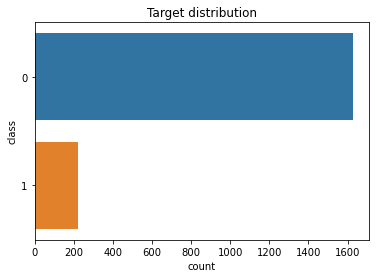

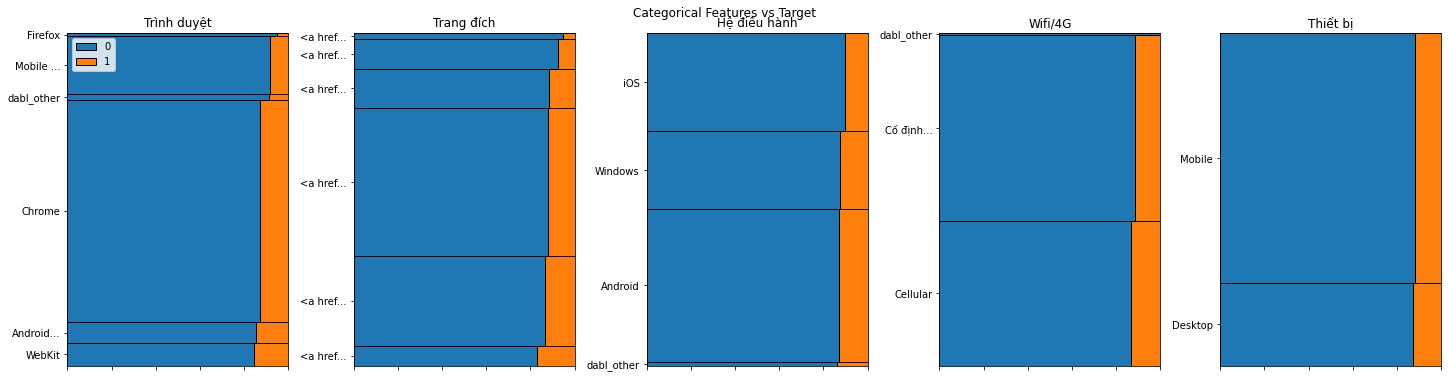

In [6]:
import pandas as pd
import cafechungkhoan
cafechungkhoan.plot(eda,'Vi phạm')

In [7]:
eda1 = eda1.dropna()

In [8]:
table1 = eda1.groupby('Từ khóa').count()
table1 = table1.reset_index()

In [9]:
table2 = eda.groupby('Từ khóa').count()
table2 = table2.reset_index()

In [10]:
merge = pd.merge(table1,table2,on='Từ khóa')

In [11]:
table3 = []
table3 = pd.DataFrame(table3)
table3['Từ khóa'] = merge['Từ khóa']
table3['#_x'] = merge['#_x']
table3['#_y'] = merge['#_y']
table3['tỉ lệ xuất hiện click ảo %'] = (table3['#_x']/table3['#_y'])*100
table3.sort_values(by=['#_y'],ascending=False)

,Từ khóa,#_x,#_y,tỉ lệ xuất hiện click ảo %
25,đăng ký đầu tư chứng khoán,57,477,11.949686
4,+mở +tài +khoản +chứng +khoán,44,396,11.111111
21,tao tai khoan chung khoan,12,160,7.500000
10,+đăng +ký +tài +khoản +chứng +khoán,14,121,11.570248
23,viet capital securities,17,97,17.525773
13,hướng dẫn đăng ký tài khoản chứng khoán,10,88,11.363636
5,+mở +tài +khoản +chứng +khoán +online,9,56,16.071429
8,+tai +khoan +chung +khoan,12,52,23.076923
1,+cách +mở +tài +khoản +chứng +khoán,3,49,6.122449
2,+lập +tài +khoản +chứng +khoán,9,44,20.454545


In [13]:
eda['target'] = eda['Vi phạm']
eda = eda.drop(['Vi phạm'],axis = 1)

In [15]:
eda_clean = cafechungkhoan.clean(eda, verbose=-1)
fc = cafechungkhoan.SimpleClassifier(random_state=2)
X = eda_clean.drop('target', axis=1)
y = eda_clean.target
fc.fit(X, y) 

Running DummyClassifier(strategy='prior')
accuracy: 0.879 average_precision: 0.121 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.468
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.879 average_precision: 0.121 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.468

Running GaussianNB()
accuracy: 0.141 average_precision: 0.122 roc_auc: 0.505 recall_macro: 0.502 f1_macro: 0.133
=== new best GaussianNB() (using recall_macro):
accuracy: 0.141 average_precision: 0.122 roc_auc: 0.505 recall_macro: 0.502 f1_macro: 0.133

Running MultinomialNB()
accuracy: 0.878 average_precision: 0.140 roc_auc: 0.526 recall_macro: 0.499 f1_macro: 0.468
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.225 average_precision: 0.124 roc_auc: 0.513 recall_macro: 0.513 f1_macro: 0.224
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.225 average_precision: 0.124 roc_auc: 0.513 recall_macro: 0.513 f

SimpleClassifier(random_state=2)